# 판다스(Pandas) 심화

## 데이터프레임 정렬

In [2]:
import numpy as np
import pandas as pd
print("DataFrame: ")
data = {
    'col1' : [2,1,9,8,7,4],
    'col2' : ['A','A','B',np.nan,'D','C'],
    'col3' : [0,1,9,4,2,3]
}
index = [1,3,2,5,0,4]
df = pd.DataFrame(data,index=index)
df

DataFrame: 


,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [7]:
# index axis=0(행)을 축으로 정렬
df = df.sort_index(axis=0)
df

,col1,col2,col3
0,7,D,2
1,2,A,0
2,9,B,9
3,1,A,1
4,4,C,3
5,8,NaN,4


In [4]:
df = df.sort_index(axis=1)
df

,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [6]:
# index axis=1(열)을 축으로 정렬, 내림차순
df = df.sort_index(axis=0, ascending=False)  # descending
df

,col1,col2,col3
5,8,NaN,4
4,4,C,3
3,1,A,1
2,9,B,9
1,2,A,0
0,7,D,2


- ascending : 오름차순
- descending : 내림차순

In [5]:
# sort_value 1
sorted_df1 = df.sort_values('col1', ascending=True)
sorted_df1

,col1,col2,col3
3,1,A,1
1,2,A,0
4,4,C,3
0,7,D,2
5,8,NaN,4
2,9,B,9


In [7]:
# sort_value 2
sorted_df2 = df.sort_values(['col2','col1'], ascending=[True,False])
sorted_df2

,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
4,4,C,3
0,7,D,2
5,8,NaN,4


## 데이터 분석용 함수

In [40]:
# 데이터 프레임의 index와 columns
import numpy as np
import pandas as pd
data = {
    'korean' : [50,60,70,30],
    'math' : [30,np.nan,40,20]
}
df = pd.DataFrame(data, index=['a','b','c','d'])
# index=['a','b','c','d']
# df = pd.DataFrame(data, index=index)

print(df.index)
print(df.columns)
print(df)

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['korean', 'math'], dtype='object')
   korean  math
a      50  30.0
b      60   NaN
c      70  40.0
d      30  20.0


In [34]:
# count() 함수
print(df.count(axis=0)) # axis=0 기본값(생략가능)
print(df.count(axis=1))

korean    4
math      3
dtype: int64
a    2
b    1
c    2
d    2
dtype: int64


In [35]:
# max(), min(), sum(), mean()
print(df.max())
print(df.max(axis=1))
print(df.min())
print(df.min(axis=1))
print(df.sum())
print(df.sum(axis=1))
print(df.mean())
print(df.mean(axis=1))
print(df.mean(axis=1, skipna=False))  # NaN값 보이게 하기

korean    70.0
math      40.0
dtype: float64
a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
korean    30.0
math      20.0
dtype: float64
a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64
korean    210.0
math       90.0
dtype: float64
a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64
korean    52.5
math      30.0
dtype: float64
a    40.0
b    60.0
c    55.0
d    25.0
dtype: float64
a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64


In [37]:
# 결측값 대체 fillna
avg = df['math'].mean()
df['math']=df['math'].fillna(avg)
df

,korean,math
a,50,30.0
b,60,30.0
c,70,40.0
d,30,20.0


 ## 그룹으로 묶기 / groupby

In [6]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key':['A','B','C','A','B','C'],
    'data1':[1,2,3,1,2,3],
    'data2':[4,4,6,0,6,1],
    # 'data3':['안녕','a','b','하세요','pple','3']
})
print("DataFrame:")
df

DataFrame:


,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [7]:
df.groupby('key').sum()
# 문자형이 아닌 숫자 3일 경우 에러발생 / TypeError: can only concatenate str (not "int") to str

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [8]:
df.groupby(['key','data1']).sum()

,,data2
key,data1,
A,1,4
B,2,10
C,3,7


In [9]:
df.groupby('key').aggregate(['min', 'median', 'max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [10]:
df.groupby('key').aggregate({'data1':'max', 'data2':'sum'})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7


In [11]:
# filter 메서드
t=list(range(1,11))
result=[]
def is_even(x):
    return True if x%2 ==0 else False
for i in t:
    if is_even(i):
        result.append(i)
print(result)

[2, 4, 6, 8, 10]


In [12]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.0,2.0
B,2.0,5.0
C,3.0,3.5


In [13]:
def filter_mean(x):
    return x['data2'].mean() > 3
df.groupby('key').filter(filter_mean)
# filter_mean(df.groupby('key'))

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [15]:
df1 = df.groupby('key').get_group('A')
df2 = df.groupby('key').get_group('B')
df3 = df.groupby('key').get_group('C')
df4 = pd.concat([df1, df3],axis=1)
df5 = pd.concat([df2, df3],axis=1)

# 평균값으로 채운다.
# means = df2['data2'].astype(int).mean()
# means
# df5.fillna(method='ffill')

# 전후의 값으로 NaN값을 채운다.
# df5.ffill()
# df5.bfill()

## 피봇과 피봇 테이블

In [16]:
import pandas as pd
df = pd.DataFrame([
    ['20210901', 'A',   1],
    ['20210901', 'B',  10],
    ['20210901', 'C', 100],
    ['20210902', 'A',   2],
    ['20210902', 'B',  20],
    ['20210902', 'C', 200],
    ['20210903', 'A',   3],
    ['20210903', 'B',  30],
    ['20210903', 'C', 300],
], columns = ['date','type', 'volume'])
df

,date,type,volume
0,20210901,A,1
1,20210901,B,10
2,20210901,C,100
3,20210902,A,2
4,20210902,B,20
5,20210902,C,200
6,20210903,A,3
7,20210903,B,30
8,20210903,C,300


In [19]:
pivot1 = df.pivot(index="date",columns="type",values="volume")
pivot1

type,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [21]:
pivot1.columns=pivot1.columns.values
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [27]:
pivot1.reset_index(level=0,inplace=True)
pivot1

,index,date,A,B,C
0,0,20210901,1,10,100
1,1,20210902,2,20,200
2,2,20210903,3,30,300


In [28]:
povot1 = pivot1.set_index('date')
pivot1

,index,date,A,B,C
0,0,20210901,1,10,100
1,1,20210902,2,20,200
2,2,20210903,3,30,300


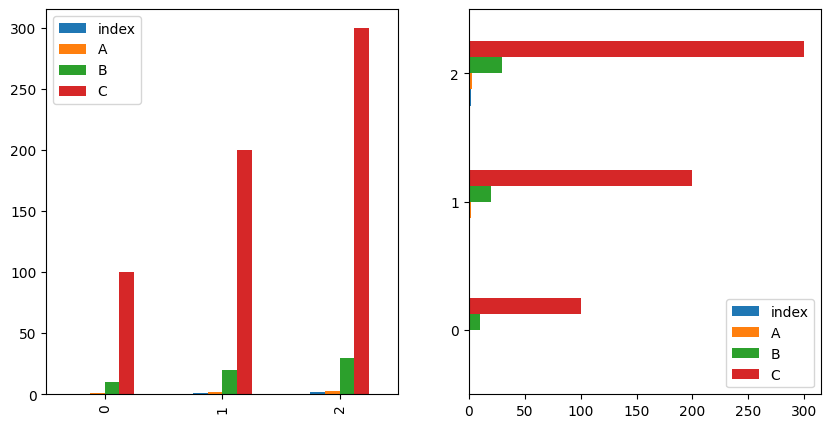

In [37]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2,figsize=(10,5))
pivot1.plot(kind='bar',ax=ax[0])
pivot1.plot(kind='barh',ax=ax[1])
plt.show()

In [38]:
import numpy as np
import pandas as pd
df=pd.DataFrame({
    '지역':['안동','안동','안동','경기',
         '경기','부산','서울','안동'],
    '요일': ['월','월','수','월','화',
          '월','목','금'],
    '강수확률':[80,70,90,10,20,30,40,80],
    '강수량':[80,50,100,200,200,100,50,1000]})
df

,지역,요일,강수확률,강수량
0,안동,월,80,80
1,안동,월,70,50
2,안동,수,90,100
3,경기,월,10,200
4,경기,화,20,200
5,부산,월,30,100
6,서울,목,40,50
7,안동,금,80,1000


In [39]:
pd.pivot_table(
    df,
    index='요일',
    columns='지역',
    aggfunc='max'
).fillna(' ')
    # aggfunc='min' 같은셀의 최소값
    # aggfunc='sum' 같은셀의 합계
    # aggfunc='mean' 같은셀의 평균

강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

In [34]:
pd.pivot_table(df,  index='요일',
                    columns='지역',
                    aggfunc=np.max)  .fillna(' ')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14124\4255918738.py:1: FutureWarning: The provided callable <function max at 0x00000146C2D3CC20> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df,  index='요일',


강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

In [40]:
data = {
    "도시": ["서울", "부산", "서울", "부산", "대구", "대구", "대구"],
    "연도": [2022, 2022, 2023, 2023, 2022, 2023, 2023],
    "판매량": [100, 80, 120, 90, 70, 60, 0]
}
df = pd.DataFrame(data)
pivot = df.pivot_table(index="도시", columns="연도", values="판매량", aggfunc="min", fill_value=0)
# df
pivot

연도,2022,2023
도시,,
대구,70,0
부산,80,90
서울,100,120
